In [1]:
%load_ext autoreload
%autoreload 2

from lib import *

Torch device: cuda:0


In [2]:
train_loader,test_loader = get_dataloaders(64)

In [3]:
cnn,test_accs,train_accs = train_network(ConvNet(),train_loader,test_loader,epochs=15)

/home/sean/sync/school/uni/w24/cv/project/venv/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/home/sean/sync/school/uni/w24/cv/project/venv/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Finished Training
Test Accuracy=98.840
Train Accuracy=99.125


In [4]:
viz = ModelVisualizer(cnn, (1,1,28,28), torch.device('cuda'))

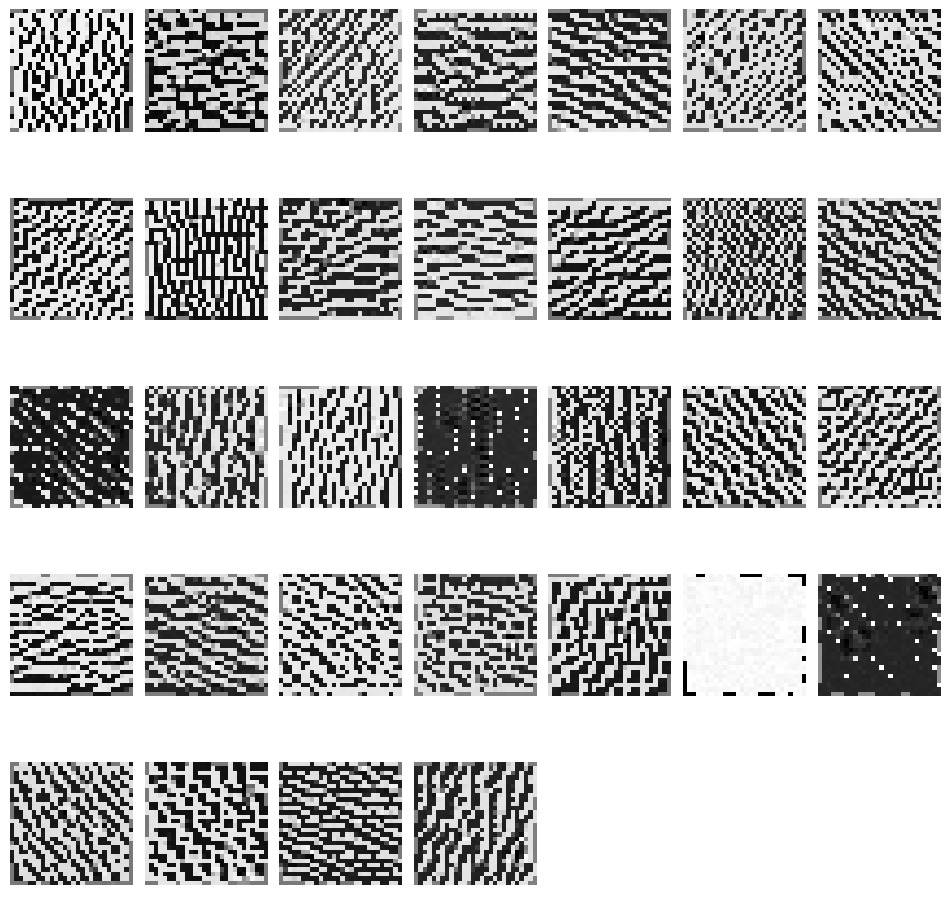

In [5]:
l1_patterns = [
    viz.optimize_input(
        layer_no=0,
        target_index=i
    ).cpu().detach().reshape((28,28)) for i in range(32)
]
show_images(l1_patterns)

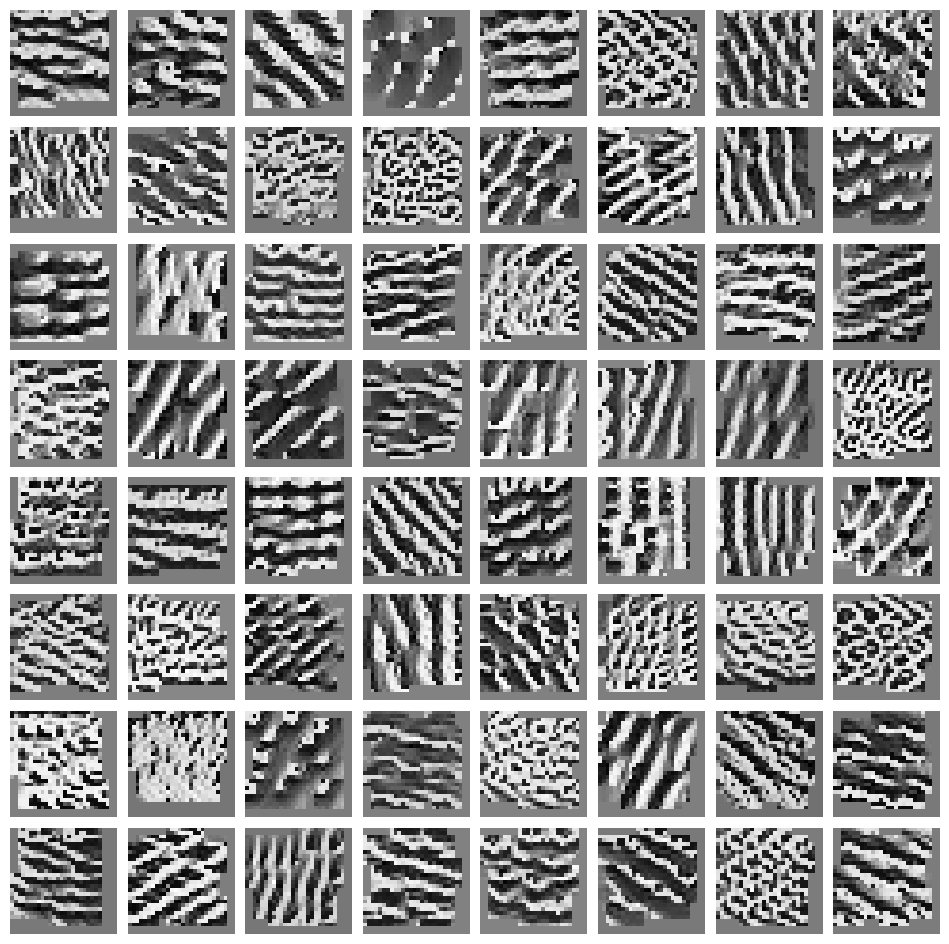

In [6]:
l2_patterns = [
    viz.optimize_input(
        layer_no=1,
        target_index=i,
        epochs=1000,
        lr=1.
    ).cpu().detach().reshape((28,28)) for i in range(64)
]
show_images(l2_patterns)

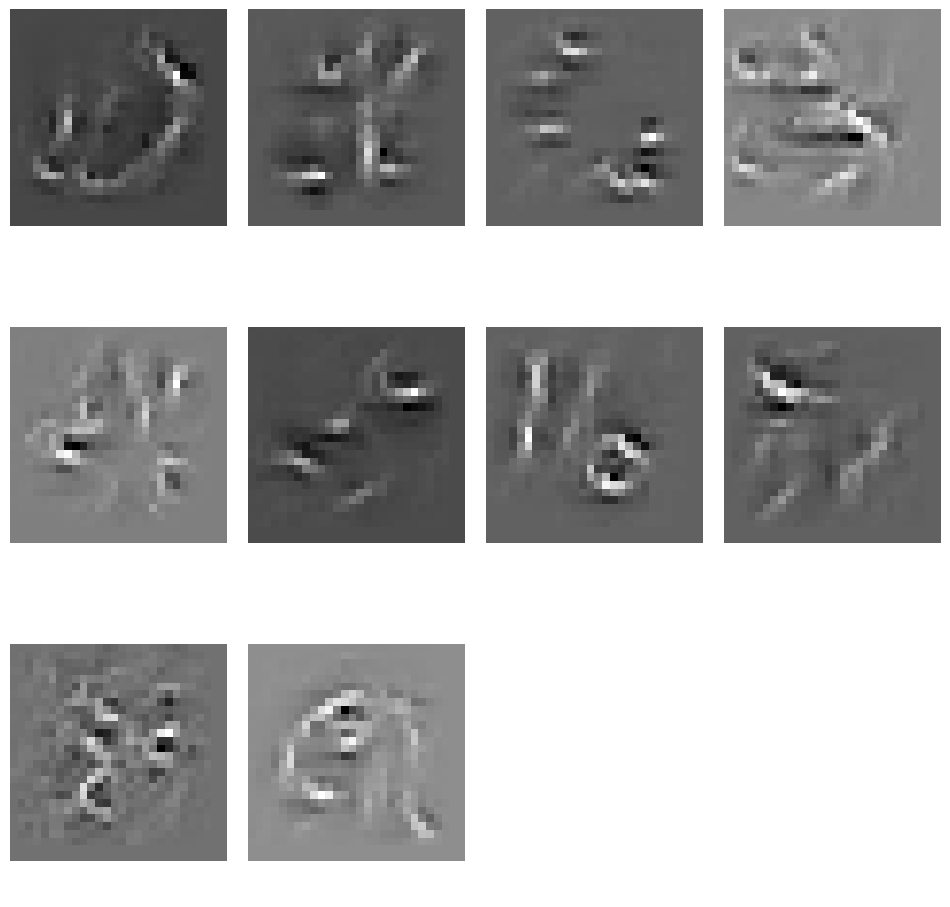

In [7]:
l3_patterns = [
    viz.optimize_input(
        layer_no=2,
        target_index=i,
        epochs=10000
    ).cpu().detach().reshape((28,28)) for i in range(10)
]
show_images(l3_patterns)

In [8]:
imgs,labels = next(iter(train_loader))

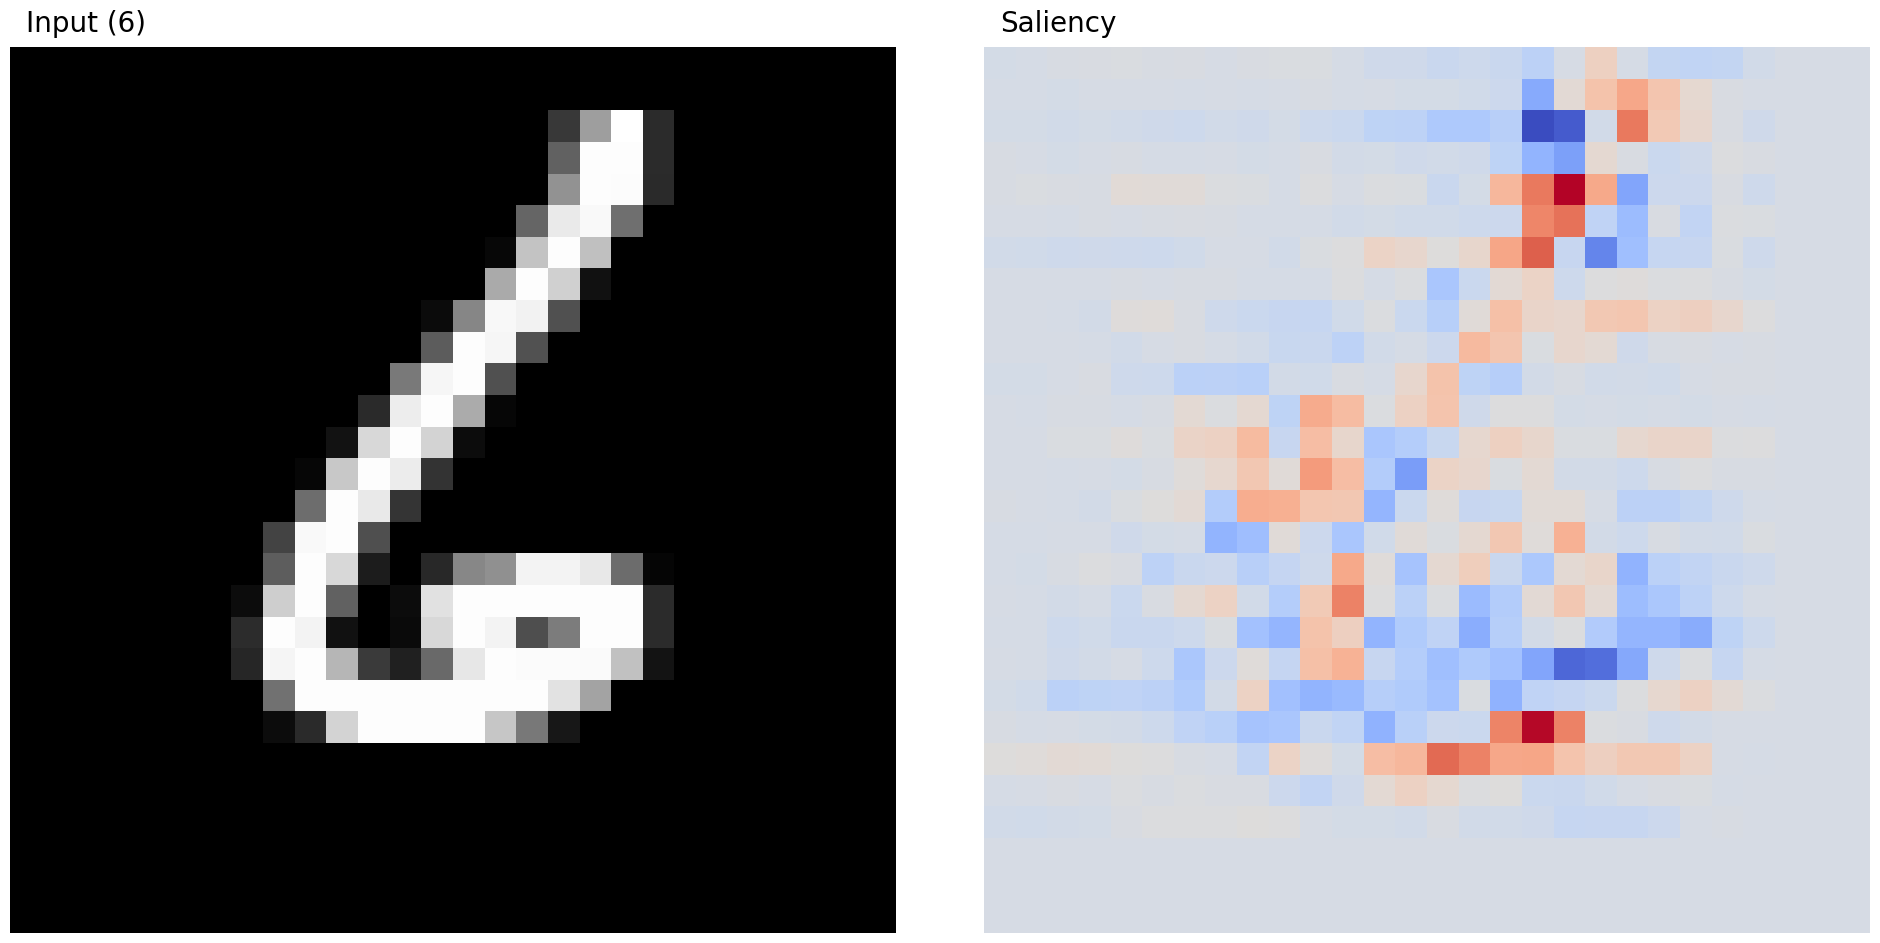

In [9]:
n = 18
visualize_saliency(viz,imgs[n],labels[n])